In [53]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder \
         .master("local") \
         .appName("Project") \
         .config("spark.some.config.option", "some-value") \
         .getOrCreate()
        
sc = spark.sparkContext

In [54]:
from pyspark.sql.types import *

df = spark.read.csv('Crimes.csv', header=True, inferSchema=True)
df.show()
#df.collect()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10000092|   HY189866|03/18/2015 07:44:...|     047XX W OHIO ST|041A|             BATTERY| AGGRAVATED: HANDGUN|             

In [12]:
spark.catalog.clearCache()

# Code not used

In [ ]:
# from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)
crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

# Not used

In [15]:
crimes = spark.read.csv("mini_crimes.csv",
                       header = True, 
                        schema = crimes_schema)

In [55]:
#crimes.show()

In [56]:
print(" The crimes dataframe has {} records".format(df.count()))

 The crimes dataframe has 6600889 records


In [57]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [58]:
df.select("Block","Arrest").show(10, truncate = False)

+----------------------+------+
|Block                 |Arrest|
+----------------------+------+
|047XX W OHIO ST       |false |
|066XX S MARSHFIELD AVE|true  |
|044XX S LAKE PARK AVE |false |
|051XX S MICHIGAN AVE  |false |
|047XX W ADAMS ST      |false |
|049XX S DREXEL BLVD   |false |
|070XX S MORGAN ST     |false |
|042XX S PRAIRIE AVE   |false |
|036XX S WOLCOTT AVE   |true  |
|097XX S PRAIRIE AVE   |false |
+----------------------+------+
only showing top 10 rows



In [59]:
df.select("Primary Type").distinct().count()

35

In [60]:
df.filter(df["Arrest"]==True).count()/df.count() * 100

27.918754579875525

In [61]:
crime_type = df.select('Primary Type')

In [62]:
crime_type.show()

+--------------------+
|        Primary Type|
+--------------------+
|             BATTERY|
|       OTHER OFFENSE|
|             BATTERY|
|             BATTERY|
|             ROBBERY|
|             BATTERY|
|             BATTERY|
|             BATTERY|
|           NARCOTICS|
|             BATTERY|
|     CRIMINAL DAMAGE|
|       OTHER OFFENSE|
|   WEAPONS VIOLATION|
|             BATTERY|
|               THEFT|
|            BURGLARY|
| MOTOR VEHICLE THEFT|
|               THEFT|
|PUBLIC PEACE VIOL...|
|               THEFT|
+--------------------+
only showing top 20 rows



In [63]:
rddcrime = crime_type.rdd
wordcounts= rddcrime.map(lambda w:(w,1)) \
        .reduceByKey(lambda a,b:a+b) 

In [64]:
for (word,count) in wordcounts.collect():
    print("%s: %i" % (word,count))

Row(Primary Type='INTIMIDATION'): 3832
Row(Primary Type='NON-CRIMINAL'): 145
Row(Primary Type='PUBLIC PEACE VIOLATION'): 47054
Row(Primary Type='BATTERY'): 1204701
Row(Primary Type='SEX OFFENSE'): 24392
Row(Primary Type='OFFENSE INVOLVING CHILDREN'): 44061
Row(Primary Type='NON-CRIMINAL (SUBJECT SPECIFIED)'): 7
Row(Primary Type='STALKING'): 3258
Row(Primary Type='CONCEALED CARRY LICENSE VIOLATION'): 187
Row(Primary Type='MOTOR VEHICLE THEFT'): 309026
Row(Primary Type='BURGLARY'): 381486
Row(Primary Type='KIDNAPPING'): 6579
Row(Primary Type='CRIMINAL TRESPASS'): 189822
Row(Primary Type='ARSON'): 10933
Row(Primary Type='OTHER OFFENSE'): 409517
Row(Primary Type='PUBLIC INDECENCY'): 154
Row(Primary Type='PROSTITUTION'): 67920
Row(Primary Type='ROBBERY'): 250499
Row(Primary Type='CRIM SEXUAL ASSAULT'): 26100
Row(Primary Type='INTERFERENCE WITH PUBLIC OFFICER'): 14433
Row(Primary Type='NON - CRIMINAL'): 38
Row(Primary Type='CRIMINAL DAMAGE'): 756105
Row(Primary Type='WEAPONS VIOLATION'): 676

In [65]:
wordcounts

PythonRDD[271] at collect at <ipython-input-64-a8e47bf3a5e2>:1

In [66]:
schemaPeople = spark.createDataFrame(wordcounts)

,Primary Type,Frequency
0,"(INTIMIDATION,)",3832
1,"(NON-CRIMINAL,)",145
2,"(PUBLIC PEACE VIOLATION,)",47054
3,"(BATTERY,)",1204701
4,"(SEX OFFENSE,)",24392
5,"(OFFENSE INVOLVING CHILDREN,)",44061
6,"(NON-CRIMINAL (SUBJECT SPECIFIED),)",7
7,"(STALKING,)",3258
8,"(CONCEALED CARRY LICENSE VIOLATION,)",187
9,"(MOTOR VEHICLE THEFT,)",309026


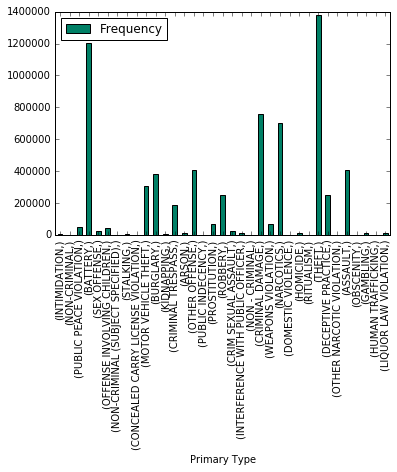

In [73]:
#renaming the column in dataframe
schemaPeople = schemaPeople.withColumnRenamed('_1','Primary Type')
schemaPeople = schemaPeople.withColumnRenamed('_2','Frequency')

schemaPanda = schemaPeople.toPandas()
display(schemaPanda)
schemaPanda.plot.bar(x ='Primary Type', y ='Frequency', colormap = 'summer')